In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('titanic_train.csv')

In [4]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Cabin'].fillna('N',inplace=True)
df['Embarked'].fillna('N',inplace=True)

In [8]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [10]:
df.Cabin.value_counts()

Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [11]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64

In [13]:
df['Cabin'] = df.Cabin.str[0]

In [14]:
df.Cabin.value_counts()

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [15]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [16]:
import seaborn as sns

<Axes: xlabel='Sex', ylabel='Survived'>

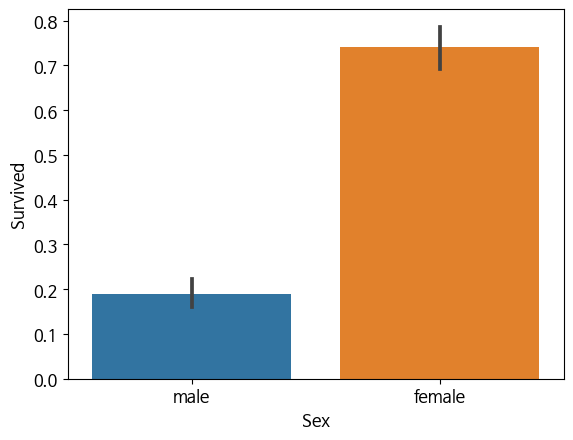

In [17]:
sns.barplot(data=df,x='Sex',y='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

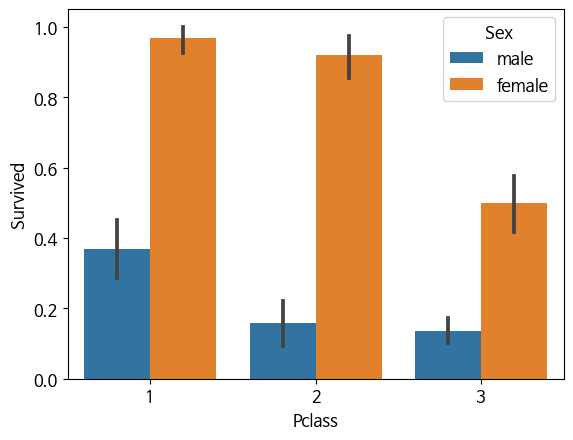

In [20]:
sns.barplot(data=df,y='Survived',x='Pclass',hue='Sex')

<Axes: xlabel='Age', ylabel='Survived'>

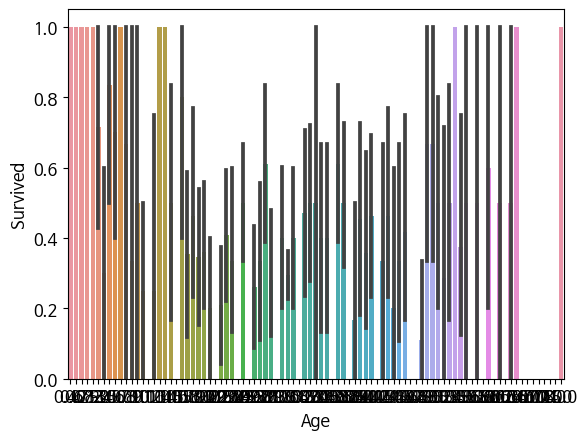

In [21]:
sns.barplot(data=df,y='Survived',x='Age')

In [22]:
def get_category(age):
    cat=''
    if age <= -1 : cat='Unknown'
    elif age <= 5: cat='Baby'
    elif age <= 12: cat='Child'
    elif age <= 18: cat='Teenager'
    elif age <= 25: cat='Student'
    elif age <= 35: cat='Young Adult'
    elif age <= 60: cat='Adult'
    else: cat='Elderly'
    return cat

In [25]:
df['Age_cat'] = df.Age.apply(lambda x : get_category(x))

In [30]:
order_name = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

<Axes: xlabel='Age_cat', ylabel='Survived'>

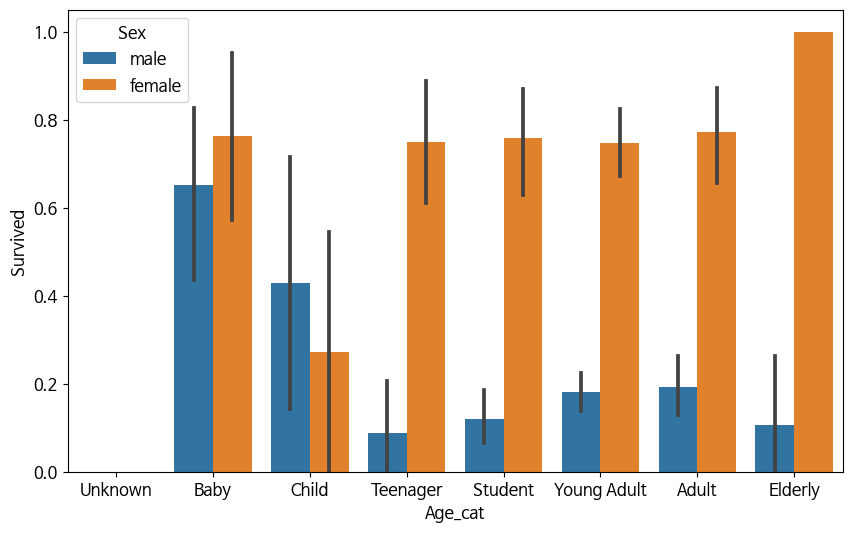

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=df, y='Survived', x='Age_cat', hue='Sex',order=order_name)

In [37]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_cat'],
      dtype='object')

In [38]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId','Name','Ticket'], inplace=True)
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df.Cabin.str[0]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] =  le.fit_transform(df[feature])
        print(le.classes_)
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [39]:
df = pd.read_csv('titanic_train.csv')
y = df.Survived 
x = df.drop(columns=['Survived'])
x = transform_features(x)

In [40]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [48]:
dt_clf = DecisionTreeClassifier(random_state=11)

In [52]:
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter=100)

In [53]:
dt_clf.fit(X_train,y_train)
pred_dt = dt_clf.predict(X_test)
accuracy_score(y_test,pred_dt)

0.7877094972067039

In [54]:
rf_clf.fit(X_train,y_train)
pred_rf = rf_clf.predict(X_test)
accuracy_score(y_test,pred_rf)

0.8547486033519553

In [55]:
lr_clf.fit(X_train,y_train)
pred_lr = lr_clf.predict(X_test)
accuracy_score(y_test,pred_lr)

C:\Users\bigdata\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8491620111731844

In [56]:
from sklearn.model_selection import GridSearchCV

In [58]:
pram = {
     'max_depth':[2,3,5,10],
     'min_samples_split':[2,3,5],
     'min_samples_leaf':[1,5,8]
}
grid_dt = GridSearchCV(dt_clf,param_grid=pram,scoring='accuracy',cv=5)
grid_rf = GridSearchCV(rf_clf,param_grid=pram,scoring='accuracy',cv=5)

grid_dt.fit(X_train,y_train)
grid_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [59]:
grid_dt.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [60]:
grid_rf.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [61]:
grid_dt.best_score_

0.7991825076332119

In [62]:
grid_rf.best_score_

0.8145966709346991

In [63]:
pred_dt = grid_dt.best_estimator_.predict(X_test)
pred_rf = grid_rf.best_estimator_.predict(X_test)

In [64]:
accuracy_score(y_test,pred_dt)

0.8715083798882681

In [65]:
accuracy_score(y_test,pred_rf)

0.88268156424581